# Imports

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

# Load dataset

In [3]:
train_dataset = pd.read_csv("data/train.csv")
train_dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Split dataset into X_train and y_train

Our y will be sale price column

In [4]:
X_data = train_dataset.drop(["SalePrice", "Id"], axis=1)
y_data = train_dataset[["SalePrice"]]

X_train data is not prepared to use. We need to replace string values with numeric codes.

In [5]:
from sklearn.preprocessing import LabelEncoder

def dataset_to_numeric(df: pd.DataFrame) -> pd.DataFrame:
    df_encoded = df.copy()
    label_encoder = LabelEncoder()

    for col in df.columns:
        if df[col].dtype == 'object':
            df_encoded[col] = label_encoder.fit_transform(df[col])
    return df_encoded

X_data = dataset_to_numeric(X_data)

Now we must split out X, y data into train and test

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, 
                                                    y_data, 
                                                    test_size=0.33, 
                                                    random_state=42)

## Price visualization

<Axes: xlabel='SalePrice', ylabel='Count'>

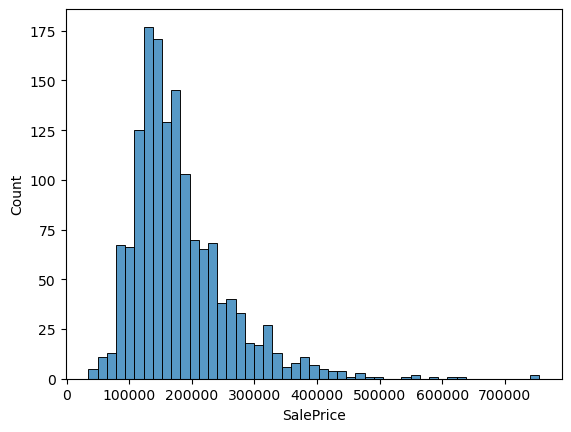

In [7]:
sns.histplot(y_data["SalePrice"])

## Correlation vusualization

In [8]:
sale_price_corr = dataset_to_numeric(train_dataset).corr()
sale_price_corr = pd.DataFrame(sale_price_corr.loc["SalePrice",:])
sale_price_corr = sale_price_corr.drop(["SalePrice", "Id"])
sale_price_corr.std().values[0]

0.31038195271533037

<Axes: ylabel='Count'>

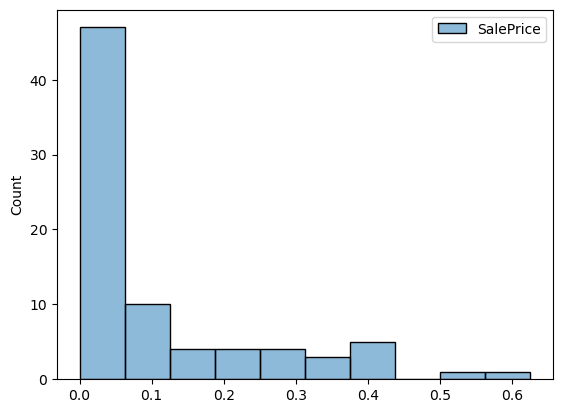

In [9]:
sale_price_corr = np.power(sale_price_corr, 2)
sns.histplot(sale_price_corr)

In [10]:
sale_price_corr[sale_price_corr.SalePrice > sale_price_corr.std().values[0]]

,SalePrice
OverallQual,0.625652
YearBuilt,0.273422
YearRemodAdd,0.257151
MasVnrArea,0.228000
ExterQual,0.405621
Foundation,0.146290
BsmtQual,0.385500
BsmtFinSF1,0.149320
TotalBsmtSF,0.376481
HeatingQC,0.160142


# Prepare model

## Imports

In [11]:
from sklearn import tree
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

## Model training

In [12]:
params = {"n_estimators": [100, 150, 200],
          "max_depth": [120, 130, 140, 150, 160, 170],
          "n_jobs": [32]}

gscv = GridSearchCV(RandomForestRegressor(), params)

In [ ]:
gscv.fit(X_train, y_train)

## Evaluation

In [14]:
best_rfr = gscv.best_estimator_

In [15]:
best_rfr.score(X_test, y_test)

0.8733107299170377

In [16]:
gscv.best_params_

{'max_depth': 170, 'n_estimators': 200, 'n_jobs': 32}

## Feature importances

In [17]:
fi_df = pd.DataFrame({'features': list(X_train),
                       'feature_importances': best_rfr.feature_importances_})\
                        .sort_values('feature_importances', ascending=False)

fi_df[fi_df.feature_importances > 0.001]

,features,feature_importances
16,OverallQual,0.541446
45,GrLivArea,0.127877
33,BsmtFinSF1,0.034847
37,TotalBsmtSF,0.032469
42,1stFlrSF,0.025731
60,GarageCars,0.021165
29,BsmtQual,0.016736
3,LotArea,0.016111
61,GarageArea,0.015993
59,GarageFinish,0.011124


# Submission

In [18]:
test_data = pd.read_csv("data/test.csv")
ids = test_data.pop("Id")
dataset_to_numeric(test_data).head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,2,3,3,0,4,...,120,0,2,2,3,0,6,2010,8,4
1,20,3,81.0,14267,1,2,0,3,0,0,...,0,0,2,4,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,2,0,3,0,4,...,0,0,2,2,3,0,3,2010,8,4
3,60,3,78.0,9978,1,2,0,3,0,4,...,0,0,2,4,3,0,6,2010,8,4
4,120,3,43.0,5005,1,2,0,1,0,4,...,144,0,2,4,3,0,1,2010,8,4


In [19]:
submission_preds = best_rfr.predict(dataset_to_numeric(test_data))
submission_df = pd.DataFrame(data={"Id": ids, "SalePrice": submission_preds})

In [20]:
submission_df.to_csv("data/submission.csv", index=False)